## 1. Meinyiapkan XML Pre-Trained Haarcascade

xml merupakan ekstensi file model yang terbentuk setelah training model dilakukan. Pada latihan ini, kita akan menggunakan model pre-trained yang telah disediakan OpenCV.

In [13]:
!gdown https://drive.google.com/uc?id=1PIX8seCgYcyR9R6vw1o88-v2QZ7YYH_J

^C


Downloading...
From: https://drive.google.com/uc?id=1PIX8seCgYcyR9R6vw1o88-v2QZ7YYH_J
To: d:\Kuliah\Materi\Orbit Campus\Materi\Object Detection\haarcascades.zip

  0%|          | 0.00/1.46M [00:00<?, ?B/s]
 36%|███▌      | 524k/1.46M [00:07<00:14, 66.7kB/s]
 72%|███████▏  | 1.05M/1.46M [00:13<00:05, 81.9kB/s]
100%|██████████| 1.46M/1.46M [00:15<00:00, 108kB/s] 
100%|██████████| 1.46M/1.46M [00:15<00:00, 95.9kB/s]


## 2. Menyiapkan Gambar Bahan Percobaan

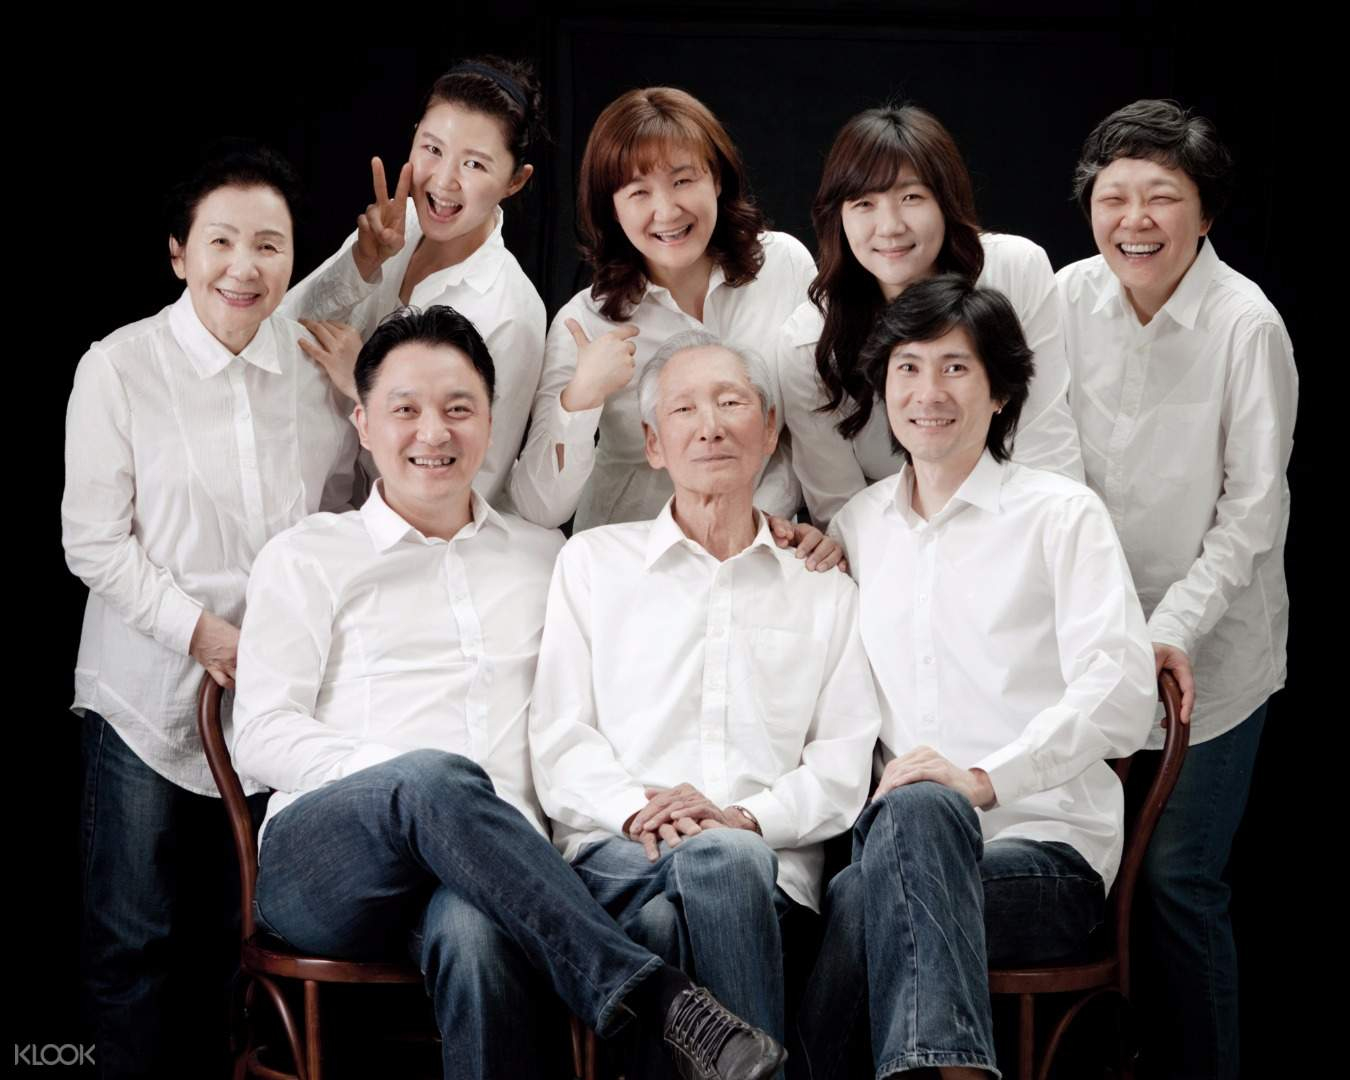

In [48]:
from IPython.display import Image
Image('family.JPG')

In [49]:
import cv2
%matplotlib inline
from matplotlib import pyplot as plt
import pylab
pylab.rcParams['figure.figsize'] = (10.0, 8.0)

## 4. Load Image

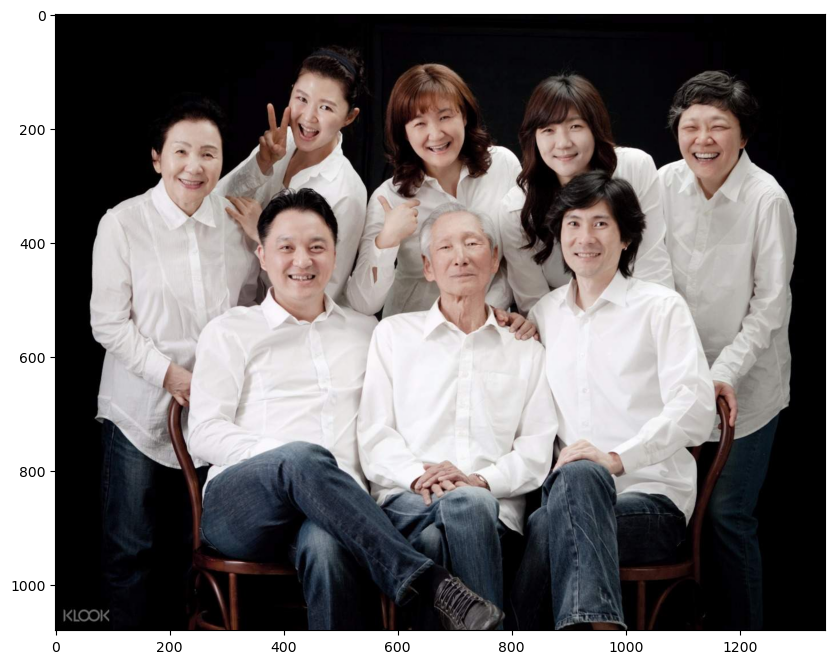

In [50]:
base_image = cv2.imread('family.jpg')
grey = cv2.cvtColor(base_image, cv2.COLOR_BGR2GRAY)
rgb = cv2.cvtColor(base_image, cv2.COLOR_BGR2RGB)
plt.imshow(rgb)

## 5. Implementasi Modedl

### Face Detection
menggunaakn pre-trained model haarcascade_frontal_default.xml untuk mendeteksi wajah pada gambar

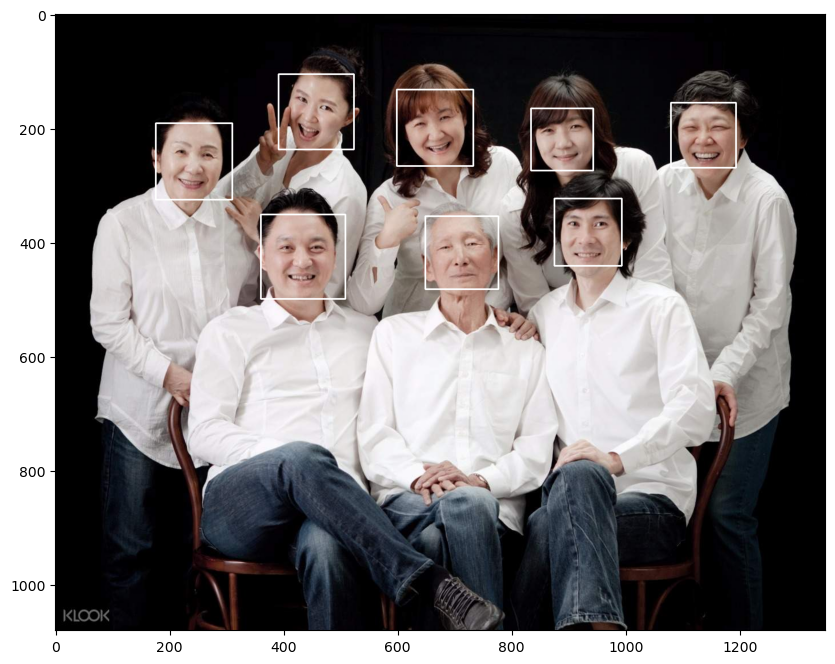

In [51]:
test_image = cv2.imread('family.jpg')
face_cascade = cv2.CascadeClassifier('./Model/haarcascade_frontalface_default.xml')
faces = face_cascade.detectMultiScale(grey, 1.3, 5)
for  (x,y,w,h) in faces:
    cv2.rectangle(test_image,(x,y),(x+w,y+h),(255,255,255),2)
face_output = cv2.cvtColor(test_image, cv2.COLOR_BGR2RGB)
plt.imshow(face_output)

### Smile Detection
untuk mendeteksi senyum pada gambar.

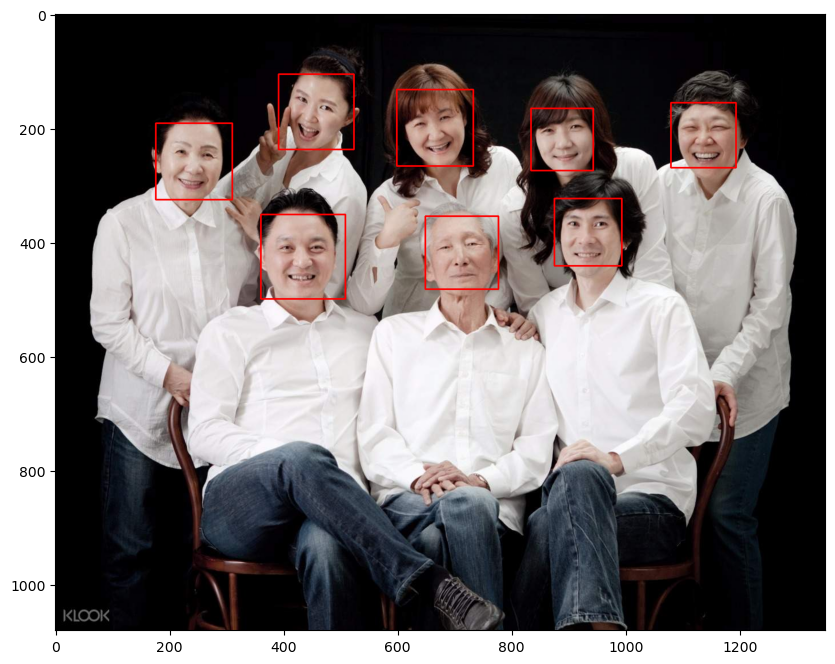

In [52]:
test_image = cv2.imread('family.jpg')
smile_cascade = cv2.CascadeClassifier('./Model/haarcascade_smile.xml')
smiles = face_cascade.detectMultiScale(grey, 1.3, 20)
for  (x,y,w,h) in faces:
    cv2.rectangle(test_image,(x,y),(x+w,y+h),(0,0,255),2)
face_output = cv2.cvtColor(test_image, cv2.COLOR_BGR2RGB)
plt.imshow(face_output)

Terdapat false positive, buat kode perkondisian

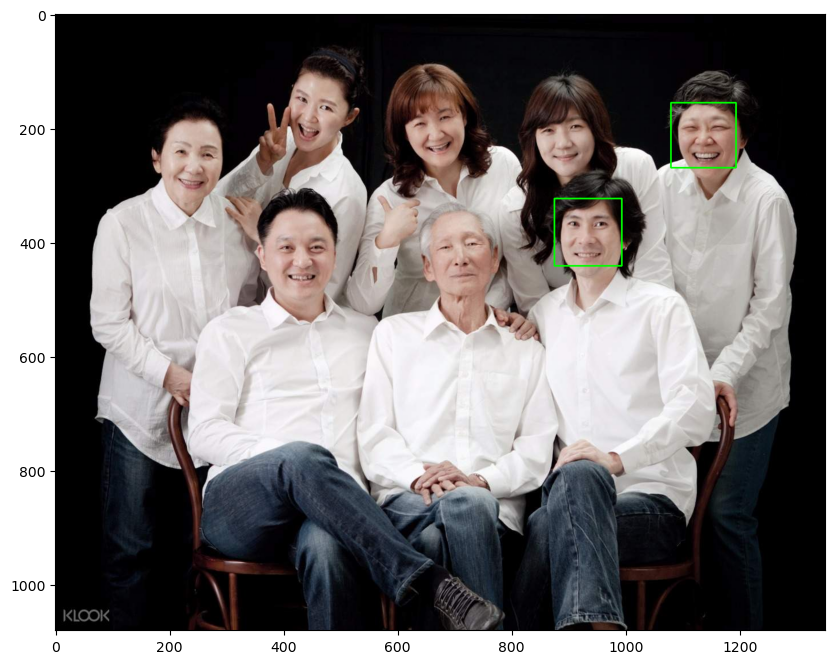

In [53]:
test_image = cv2.imread('family.jpg')
for  (x,y,w,h) in faces:
    for(x_s, y_s, w_s, h_s) in smiles:
        if((x<=x_s) and (y<=y_s) and (x+w >= x_s+w_s) and (y+h >= y_s+h_s)):
            cv2.rectangle(test_image,(x_s,y_s),(x_s+w_s,y_s+h_s),(0,255,0),2)
smile_output = cv2.cvtColor(test_image, cv2.COLOR_BGR2RGB)
plt.imshow(smile_output)